In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(40)

In [3]:
batch_size = 50

In [4]:
a1 = tf.Variable(tf.random_normal(shape = [1, 1]))
b1 = tf.Variable(tf.random_normal(shape = [1, 1]))
a2 = tf.Variable(tf.random_normal(shape = [1, 1]))
b2 = tf.Variable(tf.random_normal(shape = [1, 1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [5]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [6]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [7]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
from tensorflow.python.framework import ops
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
ops.reset_default_graph()

In [9]:
for i in range(750):
    rand_indices = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict = {x_data : x_vals})
    sess.run(train_step_relu, feed_dict = {x_data : x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict = {x_data :x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict = {x_data : x_vals}))
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict = {x_data : x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict = {x_data:x_vals})))

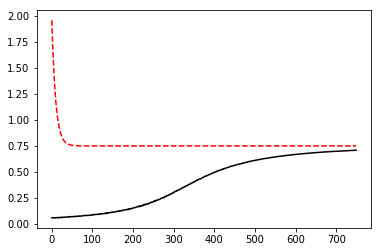

In [10]:
plt.plot(activation_sigmoid, 'k-', label = 'Sigmoid Activation')
plt.plot(activation_relu, 'r--', label = 'Rels Activation')

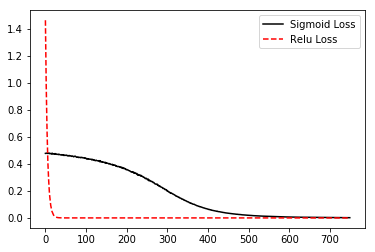

In [14]:
plt.plot(loss_vec_sigmoid, 'k-', label = 'Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label = 'Relu Loss')
plt.legend()